In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
main_df = pd.read_csv('D:/Code/python/mat3533/practice07/data/Dry_Bean_Dataset.csv',header=None)
main_df = main_df.drop(main_df.index[0]).reset_index(drop=True)
main_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,28395,610.291,208.1781167,173.888747,1.197191424,0.549812187,28715,190.1410973,0.763922518,0.988855999,0.958027126,0.913357755,0.007331506,0.003147289,0.834222388,0.998723889,SEKER
1,28734,638.018,200.5247957,182.7344194,1.097356461,0.411785251,29172,191.2727505,0.783968133,0.984985603,0.887033637,0.953860842,0.006978659,0.003563624,0.909850506,0.998430331,SEKER
2,29380,624.11,212.8261299,175.9311426,1.209712656,0.562727317,29690,193.4109041,0.778113248,0.989558774,0.947849473,0.908774239,0.007243912,0.003047733,0.825870617,0.999066137,SEKER
3,30008,645.884,210.557999,182.5165157,1.153638059,0.498615976,30724,195.4670618,0.782681273,0.976695743,0.903936374,0.928328835,0.007016729,0.003214562,0.861794425,0.994198849,SEKER
4,30140,620.134,201.8478822,190.2792788,1.06079802,0.333679658,30417,195.896503,0.773098035,0.99089325,0.984877069,0.970515523,0.00669701,0.003664972,0.941900381,0.999166059,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.9447054,1.55272833,0.765002201,42508,231.5157988,0.71457428,0.990331232,0.916603122,0.80186515,0.006858484,0.001749094,0.642987719,0.998385248,DERMASON
13607,42101,757.499,281.5763923,190.7131365,1.476439419,0.735702218,42494,231.5267977,0.799942998,0.990751636,0.922015342,0.822252163,0.006688116,0.001885835,0.67609862,0.998218654,DERMASON
13608,42139,759.321,281.5399279,191.1879789,1.472581747,0.734064781,42569,231.6312612,0.729932444,0.989898753,0.918424091,0.822729703,0.00668122,0.001888271,0.676884164,0.996767264,DERMASON
13609,42147,763.779,283.3826364,190.2757308,1.489326228,0.741054787,42667,231.6532475,0.705389121,0.987812595,0.907906457,0.817457451,0.006723673,0.001852025,0.668236684,0.99522242,DERMASON


In [3]:
print(main_df[16].unique())

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


In [4]:
X = main_df.drop(16, axis=1)
y_df = main_df[16]
targes_label = {'SEKER': 0,'BARBUNYA': 1, 'BOMBAY': 2, 'CALI': 3, 'HOROZ': 4, 'SIRA': 5, 'DERMASON': 6}
y = [targes_label[item] for item in y_df]

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Text(0, 0.5, 'Principal Component 02')

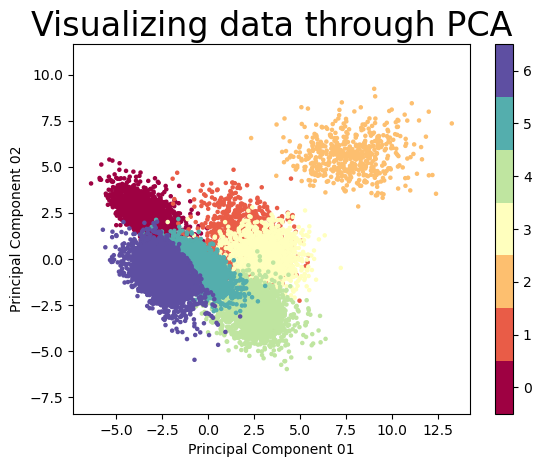

In [7]:
principal_df = pd.DataFrame(data = X_pca
             , columns = ['pc01', 'pc02'])
plt.scatter(X_pca[:, 0], X_pca[:, 1], s = 5, c = y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(8)-0.5).set_ticks(np.arange(7))
plt.title('Visualizing data through PCA', fontsize=24)
plt.xlabel('Principal Component 01')
plt.ylabel('Principal Component 02')